In [2]:
import pandas as pd

##Cargar la información de la AFP Hábitat para el fondo A

In [3]:
fondo_A = pd.read_csv('Habitat-A.csv')
fondo_A = fondo_A.drop(columns= {'Volume'})     #Se elimina temporalmente la columna 'Volume' para evitar la división por cero
print(fondo_A)

            Date   Open   High    Low  Close
0     2002-08-01  10000  10000  10000  10000
1     2002-08-02  10000  10000  10000  10000
2     2002-08-03  10000  10000  10000  10000
3     2002-08-04  10000  10000  10000  10000
4     2002-08-05  10000  10000  10000  10000
...          ...    ...    ...    ...    ...
7902  2024-03-21  71806  73044  71806  73044
7903  2024-03-22  73044  73151  73044  73151
7904  2024-03-23  73151  73151  73151  73151
7905  2024-03-24  73151  73151  73151  73151
7906  2024-03-25  73151  73446  73151  73446

[7907 rows x 5 columns]


##Cargar la información de la AFP Hábitat para el fondo E

In [4]:
fondo_E = pd.read_csv('Habitat-E.csv')
fondo_E = fondo_E.drop(columns = {'Volume'})        #Se elimina esta columna temporalmente para evitar la división por cero
print(fondo_E)

            Date   Open   High    Low  Close
0     2002-08-01  11764  11778  11764  11778
1     2002-08-02  11778  11778  11775  11775
2     2002-08-03  11775  11775  11775  11775
3     2002-08-04  11775  11775  11775  11775
4     2002-08-05  11775  11796  11775  11796
...          ...    ...    ...    ...    ...
7903  2024-03-21  54092  54098  54092  54098
7904  2024-03-22  54098  54127  54098  54127
7905  2024-03-23  54127  54127  54127  54127
7906  2024-03-24  54127  54127  54127  54127
7907  2024-03-25  54127  54273  54127  54273

[7908 rows x 5 columns]


##Se realiza una división entre el fondo E y A de la AFP Hábitat para poder comparar el valor de la Cuota

In [27]:
columnas_no_fecha = [col for col in fondo_E.columns if col != "Date" and col in fondo_A.columns]

# Nuevo DataFrame del Cociente entre el fondo E y A
df = pd.DataFrame({"Date": fondo_E["Date"]})
for col in columnas_no_fecha:
    df[col] = fondo_E[col] / fondo_A[col]

print(df)

            Date      Open      High       Low     Close
0     2002-08-01  1.176400  1.177800  1.176400  1.177800
1     2002-08-02  1.177800  1.177800  1.177500  1.177500
2     2002-08-03  1.177500  1.177500  1.177500  1.177500
3     2002-08-04  1.177500  1.177500  1.177500  1.177500
4     2002-08-05  1.177500  1.179600  1.177500  1.179600
...          ...       ...       ...       ...       ...
7903  2024-03-21  0.740540  0.739539  0.740540  0.739539
7904  2024-03-22  0.739539  0.739935  0.739539  0.739935
7905  2024-03-23  0.739935  0.739935  0.739935  0.739935
7906  2024-03-24  0.739935  0.736963  0.739935  0.736963
7907  2024-03-25       NaN       NaN       NaN       NaN

[7908 rows x 5 columns]


##Instalar la librería mplfinance

In [6]:
!pip install mplfinance


##Establecer Date como índice

In [28]:
# Suponiendo que 'df' es tu DataFrame con los datos y 'Date' es la columna de fechas
# Convertir la columna 'Date' a datetime si no está en ese formato
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la columna 'Date' como índice
df.set_index('Date', inplace=True)

In [9]:
import mplfinance as mpf

#Gráfico de velas para el año 2010

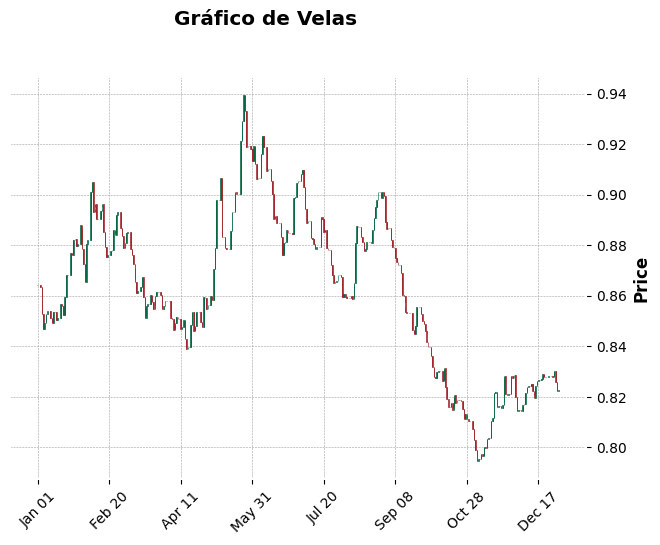

In [32]:

# Filtrar por rango de años
start_year = 2010
end_year = 2010
filtered_df = df.loc[(df.index.year >= start_year) & (df.index.year <= end_year)]

# Crear el gráfico de velas
mpf.plot(filtered_df, type='candle', style='charles', title='Gráfico de Velas')